**Load Dataset From Kaggle**

Install kaggleapi, download dataset and unzip

In [ ]:
%pip install kaggle

my_path="C:/Users/karla/Documents/Karlafaks/cloud_dataset"
!kaggle datasets download -d mmichelli/cirrus-cumulus-stratus-nimbus-ccsn-database --unzip -p my_path


In [ ]:
#%pip install tensorflow
#%pip install setuptools


**Classes and samples**

Create dataset, check and count classes. Preview sample per class.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

my_path += "/CCSN_v2"
file_types = ('*.jpg', '*.jpeg', '*.png')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    my_path,
    shuffle=True,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 2543 files belonging to 11 classes.


In [2]:
classes = dataset.class_names
classes_count = len(classes)
print("There are", classes_count, "classes:", classes)

There are 11 classes: ['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']


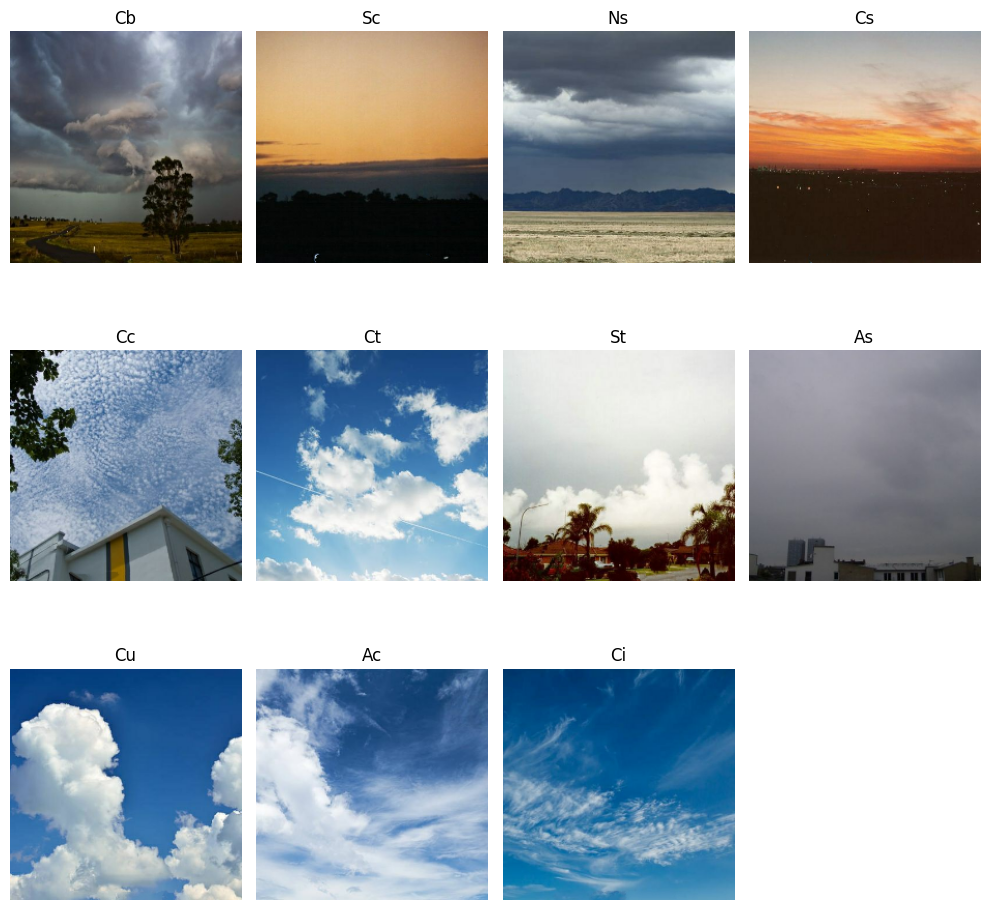

In [3]:
seen_classes = {class_name: False for class_name in classes}
class_examples = {}

for images, labels in dataset:
    for i in range(images.shape[0]):
        class_index = np.argmax(labels[i].numpy())
        class_name = classes[class_index]
        
        if not seen_classes[class_name]:
            class_examples[class_name] = images[i].numpy().astype("uint8")
            seen_classes[class_name] = True
        
        if all(seen_classes.values()):
            break
    if all(seen_classes.values()):
        break

plt.figure(figsize=(10, 10))
for idx, (class_name, image) in enumerate(class_examples.items()):
    ax = plt.subplot(3, 4, idx + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()